In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import normalize , LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Embedding
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

from functions import *

In [2]:
kf = KFold(n_splits=5, shuffle=True, random_state=111)

In [ ]:
# data read and types check
df = pd.read_csv('https://raw.githubusercontent.com/paq88/Deep-Learning-in-classification-of-common-Carp-intestine-classification/refs/heads/main/Data/Gut_bacteria_merged.csv')
print(df.shape)
print(df.dtypes)
df.head()

(124, 127)
pond                                                                                           object
d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae             float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae       float64
d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae                    float64
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae                    float64
                                                                                               ...   
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae           float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae      float64
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae           float64
d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales

pond  \
0  Gut_S10   
1  Gut_S10   
2  Gut_S10   
3  Gut_S10   
4  Gut_S10   

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
0                                             2319.0                                   
1                                             3391.0                                   
2                                             1338.0                                   
3                                             1582.0                                   
4                                             1463.0                                   

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
0                                             2187.0                                         
1                                             2071.0                                         
2                                             7053.0                                         
3                                            15595.0                                         
4                                             3891.0                                         

   d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
0                                             1743.0                            
1                                              355.0                            
2                                              669.0                            
3                                              124.0                            
4                                              541.0                            

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
0                                              500.0                            
1                                             1054.0                            
2                                              279.0                            
3                                              503.0                            
4                                                7.0                            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
0                                              521.0                                          
1                                             1024.0                                          
2                                              329.0                                          
3                                              309.0                                          
4                                               13.0                                          

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__  \
0                                              286.0            
1                                             1952.0            
2                                               63.0            
3                                                5.0            
4                                               11.0            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae  \
0                                              366.0                                                
1                                               66.0                                                
2                                               52.0                                                
3                                             3418.0                                                
4                                               61.0                                                

   d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae  \
0                                              612.0                                       
1                                              217.0                                       
2       

in this approach we will fill missing values as 0, after normalisation we will change those values to some small number - 0.00001

In [4]:
df = df.fillna(0)
df.head()

pond  \
0  Gut_S10   
1  Gut_S10   
2  Gut_S10   
3  Gut_S10   
4  Gut_S10   

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
0                                             2319.0                                   
1                                             3391.0                                   
2                                             1338.0                                   
3                                             1582.0                                   
4                                             1463.0                                   

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
0                                             2187.0                                         
1                                             2071.0                                         
2                                             7053.0                                         
3                                            15595.0                                         
4                                             3891.0                                         

   d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
0                                             1743.0                            
1                                              355.0                            
2                                              669.0                            
3                                              124.0                            
4                                              541.0                            

   d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
0                                              500.0                            
1                                             1054.0                            
2                                              279.0                            
3                                              503.0                            
4                                                7.0                            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
0                                              521.0                                          
1                                             1024.0                                          
2                                              329.0                                          
3                                              309.0                                          
4                                               13.0                                          

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__  \
0                                              286.0            
1                                             1952.0            
2                                               63.0            
3                                                5.0            
4                                               11.0            

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae  \
0                                              366.0                                                
1                                               66.0                                                
2                                               52.0                                                
3                                             3418.0                                                
4                                               61.0                                                

   d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae  \
0                                              612.0                                       
1                                              217.0                                       
2       

In [5]:
print(df.shape)
df.describe()
df

(124, 127)


pond  \
0    Gut_S10   
1    Gut_S10   
2    Gut_S10   
3    Gut_S10   
4    Gut_S10   
..       ...   
119   Gut_S9   
120   Gut_S9   
121   Gut_S9   
122   Gut_S9   
123   Gut_S9   

     d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
0                                               2319.0                                   
1                                               3391.0                                   
2                                               1338.0                                   
3                                               1582.0                                   
4                                               1463.0                                   
..                                                 ...                                   
119                                              104.0                                   
120                                              750.0                                   
121                                              183.0                                   
122                                              490.0                                   
123                                               42.0                                   

     d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
0                                               2187.0                                         
1                                               2071.0                                         
2                                               7053.0                                         
3                                              15595.0                                         
4                                               3891.0                                         
..                                                 ...                                         
119                                             9862.0                                         
120                                             3483.0                                         
121                                             1141.0                                         
122                                              167.0                                         
123                                             3597.0                                         

     d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
0                                               1743.0                            
1                                                355.0                            
2                                                669.0                            
3                                                124.0                            
4                                                541.0                            
..                                                 ...                            
119                                              107.0                            
120                                              422.0                            
121                                              134.0                            
122                                                8.0                            
123                                               30.0                            

     d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
0                                                500.0                            
1                                               1054.0                            
2                                                279.0                            
3                                                503.0                            
4                                                  7.0                            
..                                                 ...                            
119

In [6]:
predictors = df.columns[1:]
print(len(predictors))

126


Becouse we have a lot of big numbers and a lot of variation between collumns we might try to normalise the data for better results, on the other hand we could also not normalise so itll be easier for model to discover differences between bacteria abduance as a predictor value. our next steps are:
- plot our data to see for any outliers (ask prof) ew. outlier treatment 
- convert classification variable (target variable)
- create predictors and target varaiable sets
- normalise predictors set 

## Normalisation 
For AE sigmoid 

In [7]:
df_normalised = df.copy()
scaler = MinMaxScaler()
df_normalised[predictors] = scaler.fit_transform(df[predictors])
df_normalised.describe()

d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
count                                         124.000000                                   
mean                                            0.126065                                   
std                                             0.169790                                   
min                                             0.000000                                   
25%                                             0.016182                                   
50%                                             0.071169                                   
75%                                             0.157306                                   
max                                             1.000000                                   

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
count                                         124.000000                                         
mean                                            0.328018                                         
std                                             0.215601                                         
min                                             0.000000                                         
25%                                             0.144135                                         
50%                                             0.280364                                         
75%                                             0.485015                                         
max                                             1.000000                                         

       d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
count                                         124.000000                            
mean                                            0.098320                            
std                                             0.128792                            
min                                             0.000000                            
25%                                             0.021658                            
50%                                             0.060528                            
75%                                             0.138267                            
max                                             1.000000                            

       d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
count                                         124.000000                            
mean                                            0.067493                            
std                                             0.139237                            
min                                             0.000000                            
25%                                             0.000000                            
50%                                             0.001898                            
75%                                             0.086812                            
max                                             1.000000                            

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
count                                         124.000000                                          
mean                                            0.103075                                          
std                                             0.187979                                          
min                                             0.000000                                          
25%                                             0.000000                                          
50%                                             0.013184                                          
75%                                             0.127930              

## CLR transformation

In [8]:
df[predictors] = pd.DataFrame(clr_manual(df[predictors]),columns = df[predictors].columns)

In [9]:
predictors


Index(['d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae',
       'd__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae',
       'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae',
       'd__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae',
       'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae',
       'd__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae',
       ...
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alterom

In [10]:
df.describe()

d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
count                                         124.000000                                   
mean                                            5.184129                                   
std                                             1.444798                                   
min                                            -0.325684                                   
25%                                             4.245242                                   
50%                                             5.502807                                   
75%                                             6.197913                                   
max                                             7.913779                                   

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
count                                         124.000000                                         
mean                                            8.149255                                         
std                                             1.072265                                         
min                                             4.708501                                         
25%                                             7.605297                                         
50%                                             8.190011                                         
75%                                             9.010625                                         
max                                             9.793854                                         

       d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
count                                         124.000000                            
mean                                            3.644067                            
std                                             1.554761                            
min                                            -0.436293                            
25%                                             3.165891                            
50%                                             3.971892                            
75%                                             4.739503                            
max                                             6.362286                            

       d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
count                                         124.000000                            
mean                                            1.438091                            
std                                             2.158231                            
min                                            -1.245936                            
25%                                            -0.408017                            
50%                                             0.400069                            
75%                                             3.659931                            
max                                             5.991671                            

       d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae  \
count                                         124.000000                                          
mean                                            1.940012                                          
std                                             2.209887                                          
min                                            -0.858576                                          
25%                                            -0.366712                                          
50%                                             2.041522                                          
75%                                             4.141260              

## conversion of class variable


Explanation of pond coding
| number | setup | pond numbers | water supplementation | feed suplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|

In [11]:
codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]}
codes3 = {0 : [8,14,18,24,29], 1: [12,16,19,23,26,9,13,17,20,27], 2 : [10,21,28,30,32,11,15,22,25,31]}
codes2 = {0 : [8,14,18,24,29,12,16,19,23,26,9,13,17,20,27], 1 : [10,21,28,30,32,11,15,22,25,31]}

df['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
df['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
df['pond_2'] = df['pond'].apply(lambda x: pond_decoder(x,codes2))

df_normalised['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
df_normalised['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
df_normalised['pond_2'] = df['pond'].apply(lambda x: pond_decoder(x,codes2))


C:\Users\marek\AppData\Local\Temp\ipykernel_27012\1000640414.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pond_5'] = df['pond'].apply(lambda x: pond_decoder(x,codes))
C:\Users\marek\AppData\Local\Temp\ipykernel_27012\1000640414.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pond_3'] = df['pond'].apply(lambda x: pond_decoder(x,codes3))
C:\Users\marek\AppData\Local\Temp\ipykernel_27012\1000640414.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [12]:
df = df.copy()
df_normalised = df_normalised.copy()

## Splitting data into train and test sets

In [13]:
df_train_val, df_test = train_test_split(df, test_size=0.2, random_state=111, stratify=df['pond_5'], shuffle=True)
df_train_val.shape, df_test.shape

((99, 130), (25, 130))

# Creating autoencoder 

In [14]:
#reset_weights(autoencoder)

X_train_val = df_train_val[predictors]
X_test = df_test[predictors]
input_data = Input(shape = (X_train_val.shape[1],))
encoding_dim = 19

encoded = Dense(64, activation='linear')(input_data)
encoded = Dense(32, activation='linear')(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)

decoded = Dense(32, activation='linear')(encoded)
decoded = Dense(64, activation='linear')(decoded)
decoded = Dense(X_train_val.shape[1], activation='linear')(decoded)

autoencoder = Model(input_data, decoded)

encoder = Model(input_data, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

history_ae = autoencoder.fit(X_train_val, X_train_val, epochs=2000, batch_size=32, shuffle=True, validation_split=0.2)#, callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

embeddings_train = encoder.predict(X_train_val)
embeddings_test = encoder.predict(X_test)



Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 3.2458 - val_loss: 2.8243
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.8137 - val_loss: 2.4936
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3950 - val_loss: 2.1450
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.1002 - val_loss: 1.8787
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.7686 - val_loss: 1.6828
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.5896 - val_loss: 1.4683
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.3809 - val_loss: 1.2752
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.1809 - val_loss: 1.1409
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.0253 - val_loss: 1.0529
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9495 - val_loss: 0.9888
Epoch 11/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8905 - val_loss: 0.9390
Epoch 12/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.

## Evaluating autoencoder

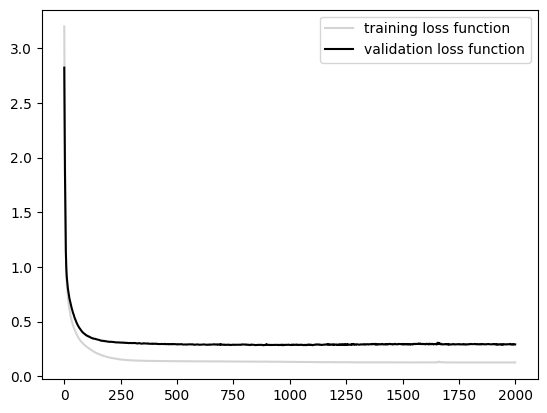

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


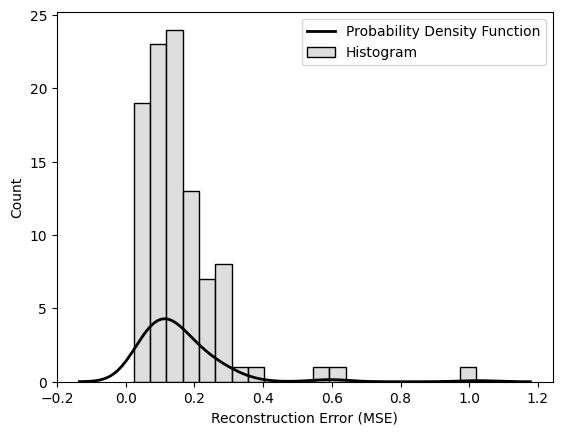

In [15]:
plt.plot(history_ae.history['loss'], label='training loss function', color = 'lightgrey')
plt.plot(history_ae.history['val_loss'], label='validation loss function', color = 'black')
plt.legend()
plt.show()


# reconstruction error 
reconstructed = autoencoder.predict(X_train_val)
reconstruction_error = np.mean(np.square(X_train_val - reconstructed), axis=1) #for each sample
# Plot histogram
sns.histplot(
    reconstruction_error,
    kde=False,
    color='lightgrey',
    label='Histogram'
)
# Plot KDE separately to set label
sns.kdeplot(
    reconstruction_error,
    color='black',
    linewidth=2,
    label='Probability Density Function',
)
plt.legend()
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Count')
plt.show()

In [16]:
pd.DataFrame(reconstructed)

0         1         2         3         4         5         6    \
0   4.934552  9.115543  4.544033  3.667475  3.141263 -0.444464 -0.321150   
1   2.909870  9.175158  1.331684 -0.086701 -0.012166  1.064832  4.273739   
2   4.986567  7.063497  5.479830  0.177168  2.598711  2.780490  3.827792   
3   3.827353  9.134562  4.220942  0.036289 -0.093009  1.802505 -0.649309   
4   6.654347  8.195264  3.500522  5.045180  3.814747  2.840229  3.194477   
..       ...       ...       ...       ...       ...       ...       ...   
94  6.669129  6.461732  5.191795  0.454736  3.523369  7.410326  6.824914   
95  5.433883  7.696536  5.012251  1.724385  3.952116  4.489153 -0.898647   
96  5.432718  8.698966  4.470804 -0.378425 -0.193234 -0.664447  2.797364   
97  4.614408  9.053174 -0.098203 -0.522984 -0.530324 -0.382900  0.187599   
98  3.770390  8.114470  3.926397  2.351632  1.939723  2.846851  9.102595   

         7         8         9    ...       116       117       118       119  \
0   4.585610  1.034879  0.706577  ... -0.507945 -0.524453 -0.514277 -0.482028   
1   1.067822 -0.226347 -0.321421  ... -0.286461 -0.299553 -0.288763 -0.383561   
2   7.114224 -0.623614  1.094916  ... -0.497180 -0.798183 -0.515514 -0.915766   
3   5.050002 -0.076103 -0.374742  ... -0.307294 -0.339945 -0.314519 -0.434828   
4   2.916496  2.413356  1.485383  ... -0.739600 -0.797399 -0.741950 -1.047304   
..       ...       ...       ...  ...       ...       ...       ...       ...   
94  5.368089  3.001875  1.311134  ... -0.931671 -1.117734 -0.925857 -0.420990   
95  6.738714  2.344176  1.514798  ... -0.757681 -0.513453 -0.762009 -0.661295   
96  4.432610  0.706979 -0.485277  ... -0.572255 -0.534936 -0.548913 -0.105674   
97  2.273972  0.707153 -0.437897  ... -0.415419 -0.332531 -0.403494 -0.636506   
98  3.628852  0.594641  0.593475  ... -0.627567 -0.550886 -0.628856  0.150260   

         120       121       122       123       124       125  
0  -0.535619 -0.571818 -0.582901 -0.576750 -0.537701 -0.580709  
1  -0.275138 -0.337769 -0.275363 -0.279070 -0.404872 -0.282297  
2  -0.577068 -1.094992 -0.731813 -0.721026 -0.679096 -0.712612  
3  -0.347787 -0.492149 -0.439005 -0.446457 -0.409059 -0.433188  
4  -0.748462 -0.850518 -0.741193 -0.723354 -0.909934 -0.731128  
..       ...       ...       ...       ...       ...       ...  
94 -0.912471 -0.991667 -0.894988 -0.872178 -1.015591 -0.860672  
95 -0.771444 -0.419564 -0.822527 -0.818698 -0.517521 -0.800502  
96 -0.496635 -0.446595 -0.387357 -0.395289 -0.099194 -0.390666  
97 -0.396679 -0.232926 -0.394803 -0.402189 -0.207738 -0.394771  
98 -0.615524 -0.473721 -0.592296 -0.590809 -0.420154 -0.586566  

[99 rows x 126 columns]

In [17]:
X_train_val

d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae  \
12                                            4.900678                                   
43                                            2.544049                                   
21                                            4.838797                                   
72                                            4.102492                                   
13                                            6.000577                                   
..                                                 ...                                   
109                                           6.503508                                   
112                                           5.621300                                   
81                                            4.601858                                   
116                                           5.009455                                   
123                                           3.229910                                   

     d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae  \
12                                            8.778924                                         
43                                            8.984995                                         
21                                            7.851771                                         
72                                            9.439924                                         
13                                            7.798981                                         
..                                                 ...                                         
109                                           4.986240                                         
112                                           7.804818                                         
81                                            8.374549                                         
116                                           9.015051                                         
123                                           7.656844                                         

     d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae  \
12                                            3.956863                            
43                                            2.013421                            
21                                            5.857916                            
72                                            4.197803                            
13                                            3.773830                            
..                                                 ...                            
109                                           4.725447                            
112                                           4.565022                            
81                                            5.057184                            
116                                           0.308975                            
123                                           2.902697                            

     d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae  \
12                                            4.322797                            
43                                           -0.289164                            
21                                           -0.694592                            
72                                           -0.397317                            
13                                            4.930640                            
..                                                 ...                            
109                                          -0.775811                            
112                                           2.798840                            
81                         

# 5 classes


In [18]:
y_train_val = df_train_val['pond_5']
y_test = df_test['pond_5']

In [19]:
embeddings_df = pd.DataFrame(embeddings_train)
column_names = embeddings_df.columns.tolist()
print(column_names)
y_train_val.reset_index(drop=True, inplace=True)
embeddings_df['pond'] = y_train_val
embeddings_df


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


0         1         2         3         4         5         6  \
0   0.097162  0.598220  3.061121  3.953025 -1.446950 -0.698001 -1.272183   
1   2.069869 -1.259603  0.028005  4.508870  0.253073  2.005822 -1.310963   
2   1.213662 -2.624360  1.394847  2.199460  0.580550 -0.118467  0.347087   
3   2.299466 -2.488590  3.641233  1.911902 -3.122933  0.049510 -2.419570   
4  -0.105362 -0.339906  2.121739  5.148392 -0.520948 -1.529210 -0.292256   
..       ...       ...       ...       ...       ...       ...       ...   
94 -0.727397 -4.736554 -0.108478  2.330424  0.655729 -2.028239  2.489923   
95  0.447982 -2.962097  0.569731  1.246249 -1.999047  0.214195  1.556411   
96  1.736921 -1.196094  1.663995  4.496232 -0.004469  1.851311 -0.317636   
97  3.617186  0.956419  2.221120  2.880093  1.111694  3.392036  1.650851   
98  0.324391 -1.663795  1.426115  4.659164 -1.504771  1.967209 -2.461854   

           7         8         9        10        11        12        13  \
0  -1.826070 -1.906067  3.150808  0.232363  0.246516 -2.220399 -0.195092   
1   1.163751 -0.457070  1.537911 -1.809077  1.436642 -1.756396  2.600240   
2   0.566153 -5.309326  1.566320 -0.036486 -1.262783  3.906370  1.033287   
3  -1.420177 -2.563940  1.166513 -1.762551 -0.340532 -0.044055  0.660318   
4  -0.216996  1.840256  1.359030  0.703973  0.044464 -1.987165  2.984255   
..       ...       ...       ...       ...       ...       ...       ...   
94 -3.524209  0.676900 -0.405925 -2.487177 -1.115165  5.116223  4.743711   
95 -4.809459 -1.296340  0.234256 -2.471813 -3.023181  0.413160  0.044237   
96  1.308821 -1.107452  2.993595 -1.405699  1.871684  1.929868  2.960461   
97  0.661572  0.160077  3.734395 -2.725540  0.424023 -1.384790  2.332885   
98 -0.486954 -0.026809 -0.087476 -2.524987  1.035861  1.161298  2.544799   

          14        15        16        17        18  pond  
0   1.088895 -1.762157  1.308152  0.590729  2.217726     1  
1   1.424976  0.691763  1.130139  1.742618 -0.251161     0  
2   1.720583  0.160937  3.428502  2.415976  1.699275     0  
3   0.587156  3.075882 -1.026614  1.671919  1.874892     0  
4   1.845051 -3.843965  4.172751  0.679799  1.639024     1  
..       ...       ...       ...       ...       ...   ...  
94  0.308211  0.927089  5.155880  1.574426  3.456956     4  
95 -1.541412  0.508932 -0.004554  2.030290  6.017122     2  
96 -2.658435  0.497213  0.598777 -0.683082  0.383867     1  
97 -1.028802  0.109721  1.985504 -2.634680 -0.887996     0  
98  0.403597  2.392198  4.189985  5.054515  1.441073     3  

[99 rows x 20 columns]

In [20]:
#embeddings_df.to_csv('embeddings_5.csv', index=False)
#embeddings_df = pd.read_csv('embeddings_5.csv')

## dense model 
fitting on embeded dataset


In [21]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(128, input_shape=(encoding_dim,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model1.add(keras.layers.Dropout(rate=0.25))
model1.add(keras.layers.Dense(64, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
#model1.add(keras.layers.Dropout(rate=0.25))
model1.add(keras.layers.Dense(8, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model1.add(keras.layers.Dense(5, activation ='softmax'))

model1.summary()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,381 (44.46 KB)

 Trainable params: 11,381 (44.46 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.6500 - loss: 1.6721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
predicted classes:       [3 3 2 1 2 0 0 4 3 1 1 0 2 4 0 2 4 3 4 2]
true validation classes: [3 3 1 2 2 0 1 1 3 1 1 4 2 4 0 2 4 1 3 2]
mean confidence score: 64.7133, sd confidence score: 89.8739
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6000 - loss: 1.4125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
predicted classes:       [4 4 2 4 4 2 0 2 3 4 1 3 4 4 4 2 3 1 2 4]
true validation classes: [0 0 0 2 4 0 0 2 3 0 1 3 4 4 0 2 3 1 2 1]
mean confidence score: 162.0717, sd confidence score: 373.1463
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3500 - loss: 2.6949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predicted classes:       [1 1 1 2 4 4 4 3 1 4 1 3 2 3 2 3 2 3 1 3]
true validation classes: [1 1 2 2 0 4 0 3 0 4 3 1 4 2 2 1 3 1 4 1]
mean confidence score: 287.2168, sd confidence score: 11

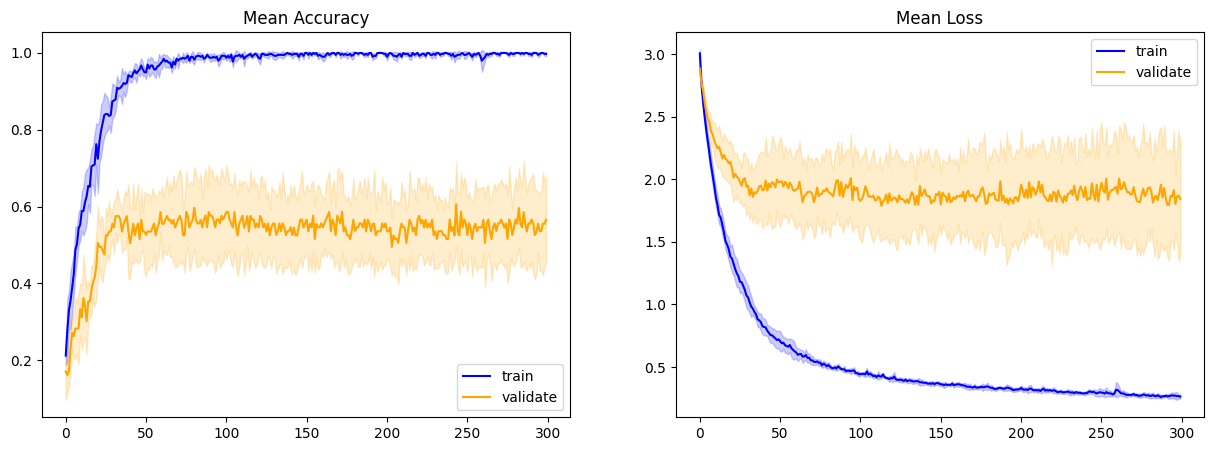

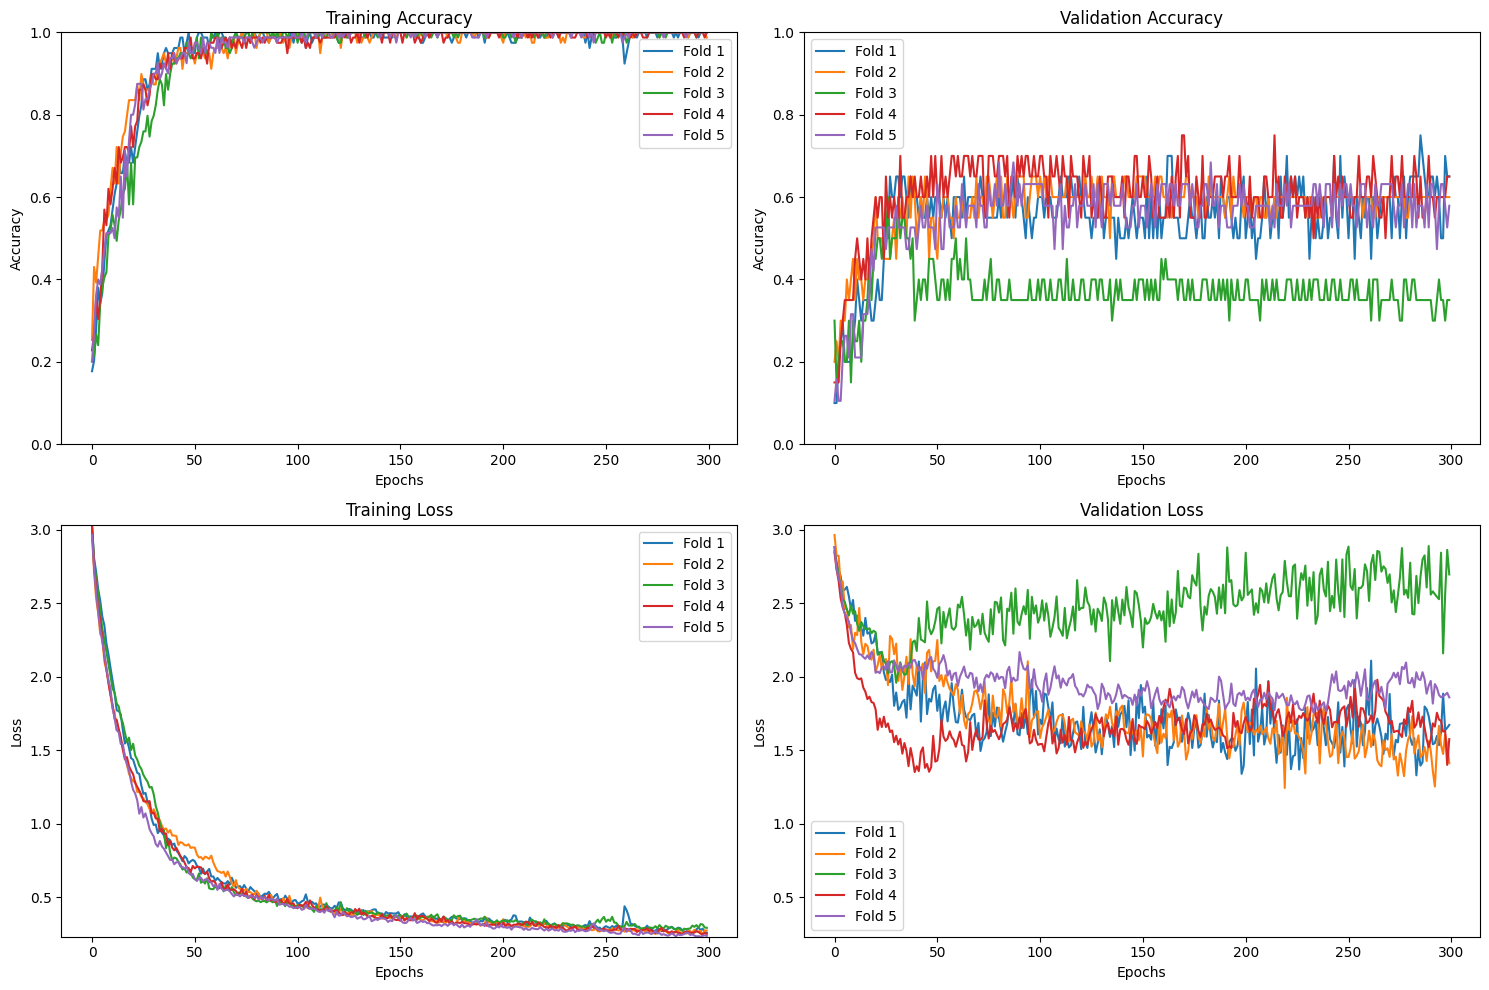

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
predicted classes:       [3 0 4 2 0 3 3 1 2 0 0 2 4 1 3 0 4 0 3]
true validation classes: [4 0 4 2 2 0 3 1 2 0 2 4 4 3 3 4 1 0 3]


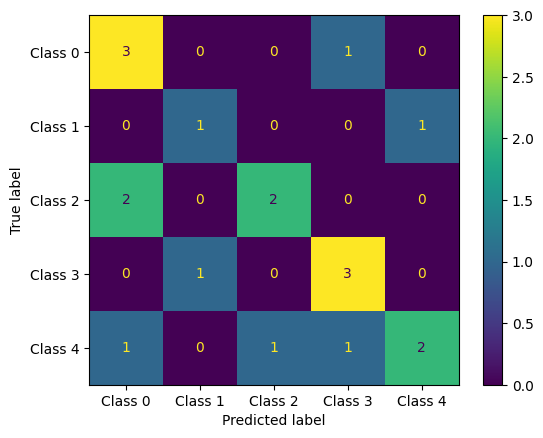

In [22]:
crossvalidate(embeddings_df, model1, column_names, 'pond', kf, 300)

### Test Dataset

In [23]:
X_train = embeddings_df[column_names]
y_train = embeddings_df['pond']
y_train = keras.utils.to_categorical(y_train)
X_test = pd.DataFrame(embeddings_test, columns=column_names)
y_test = df_test['pond_5']
y_test = keras.utils.to_categorical(y_test)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8607 - loss: 0.7160 - val_accuracy: 0.5200 - val_loss: 1.5643
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7986 - loss: 0.8573 - val_accuracy: 0.6400 - val_loss: 1.1446
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9215 - loss: 0.4652 - val_accuracy: 0.6400 - val_loss: 1.0887
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9277 - loss: 0.4759 - val_accuracy: 0.5600 - val_loss: 1.4008
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.4829 - val_accuracy: 0.7600 - val_loss: 0.9891
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.4194 - val_accuracy: 0.6000 - val_loss: 1.1110
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.3490 - val_accuracy: 0.6400 - val_loss: 1.1788
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9833 - loss: 0.3561 - val_accuracy: 0.6000 - v

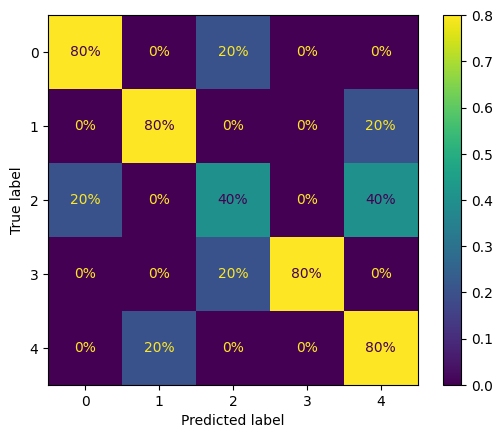

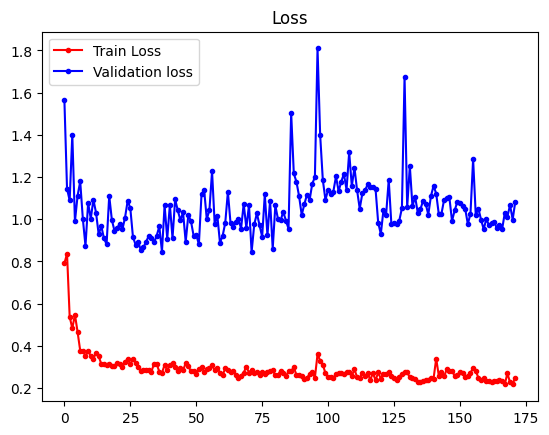

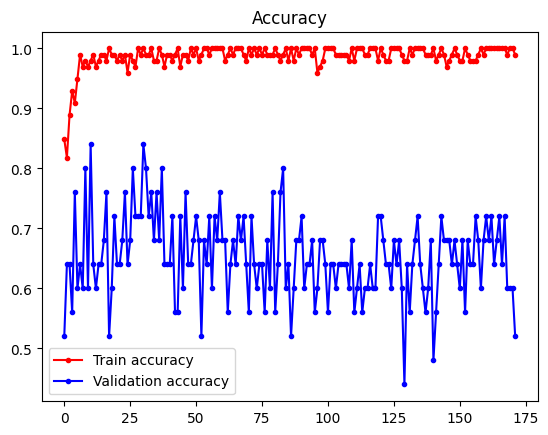

In [24]:
history1=model1.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model1, history1, X_test, y_test)

## Convolutional model

In [27]:
model1c = keras.Sequential()
model1c.add(keras.layers.Conv1D(filters=2, kernel_size=3, activation='relu',input_shape = (encoding_dim,1),kernel_regularizer=keras.regularizers.l2(0.01)))
#model1c.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model1c.add(keras.layers.MaxPooling1D(pool_size = 2))
model1c.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model1c.add(Flatten())
model1c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model1c.add(keras.layers.Dropout(rate = 0.25))
model1c.add(keras.layers.Dense(16, activation = 'relu'))
model1c.add(keras.layers.Dense(5, activation ='softmax'))

model1c.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model1c.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 17, 2)          │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 8, 2)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,229 (67.30 KB)

 Trainable params: 17,229 (67.30 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 5
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.4000 - loss: 1.7917
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
predicted classes:       [3 3 0 2 2 2 4 4 3 1 2 0 3 0 2 3 4 0 3 3]
true validation classes: [3 3 1 2 2 0 1 1 3 1 1 4 2 4 0 2 4 1 3 2]
mean confidence score: 3.154, sd confidence score: 2.827
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 1.6469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
predicted classes:       [3 3 0 1 4 0 0 2 3 4 1 3 0 1 4 3 3 1 0 2]
true validation classes: [0 0 0 2 4 0 0 2 3 0 1 3 4 4 0 2 3 1 2 1]
mean confidence score: 5.011, sd confidence score: 7.4598
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4000 - loss: 1.9548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted classes:       [1 1 3 2 1 1 2 0 1 4 1 1 2 1 2 1 2 3 0 1]
true validation classes: [1 1 2 2 0 4 0 3 0 4 3 1 4 2 2 1 3 1 4 1]
mean confidence score: 10.9202, sd confidence score: 21.4171
trai

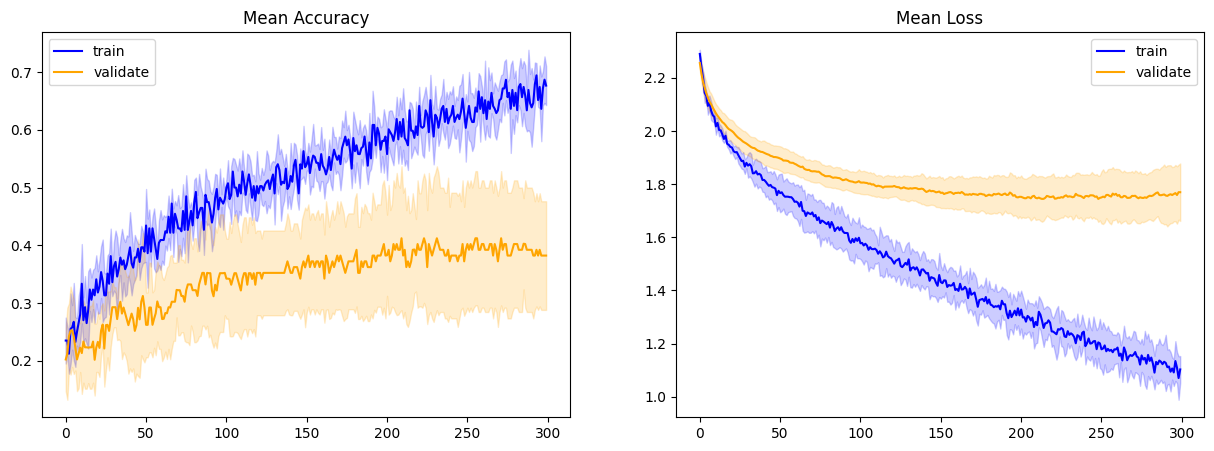

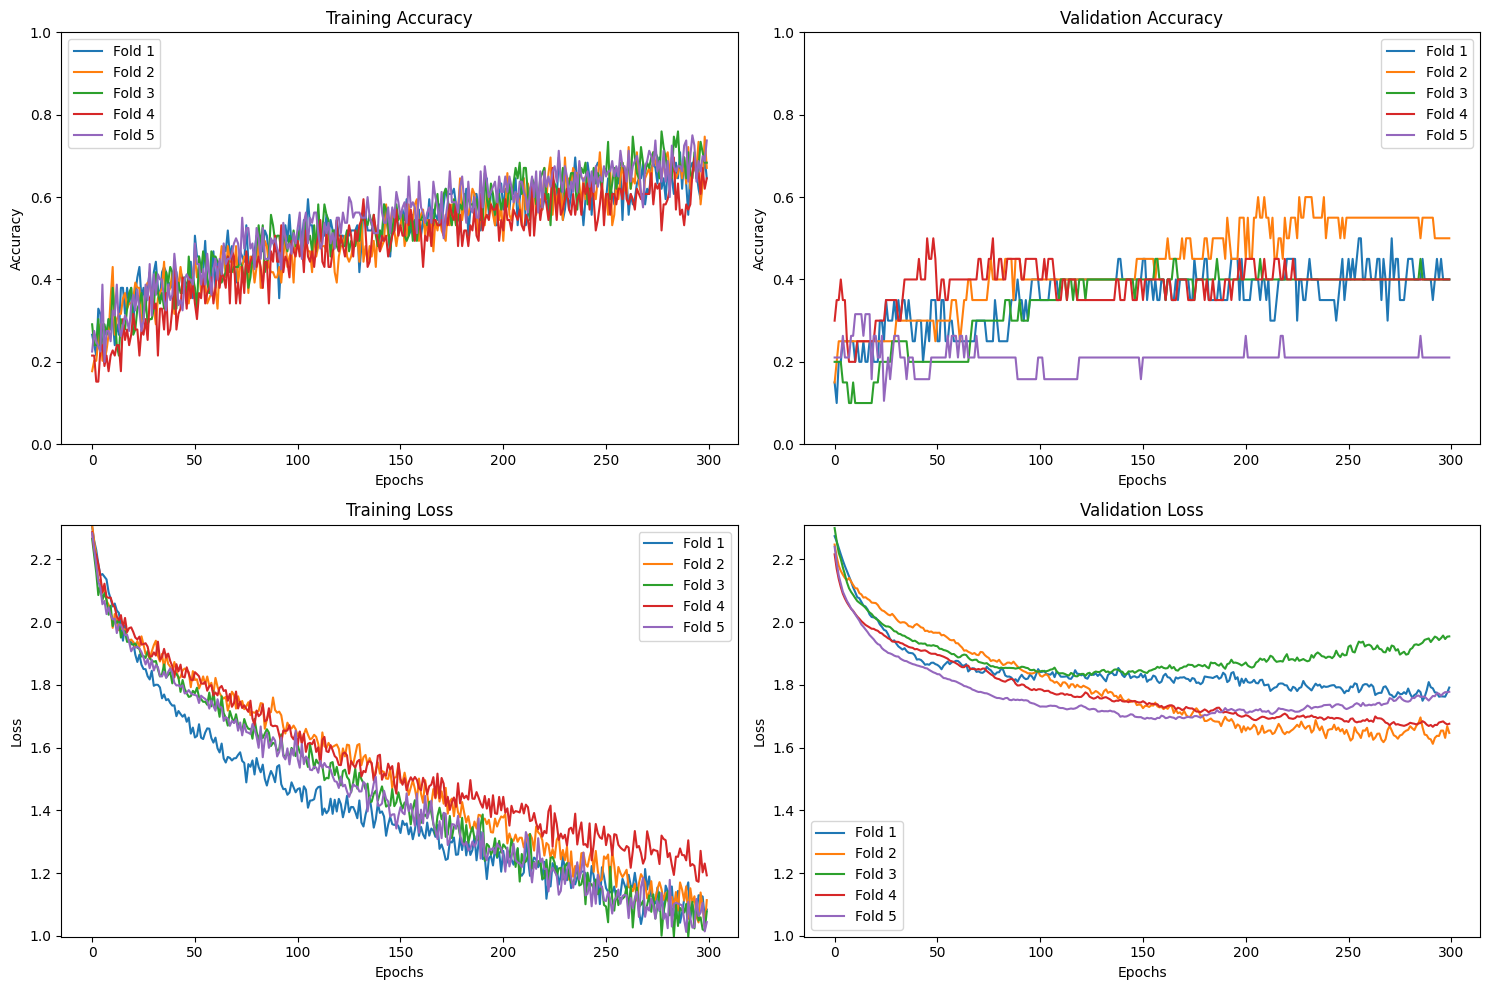

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
predicted classes:       [1 0 1 2 0 3 1 1 2 2 0 2 0 1 0 0 0 2 0]
true validation classes: [4 0 4 2 2 0 3 1 2 0 2 4 4 3 3 4 1 0 3]


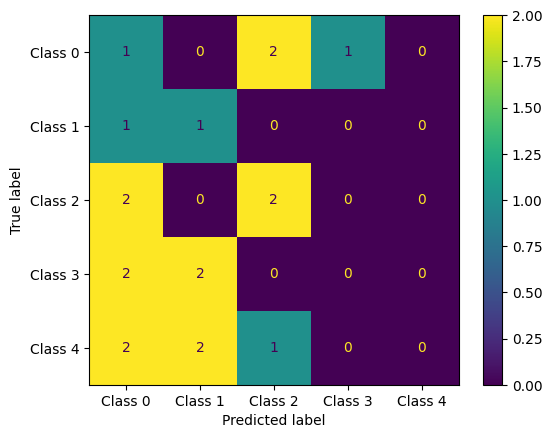

In [28]:
reset_weights(model1c)
crossvalidate(embeddings_df, model1c, column_names, 'pond',kf,300,True)

### Test    

In [29]:
X_train_c = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_c = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4400 - loss: 1.5799
[1.5798755884170532, 0.4399999976158142]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted values: [1 0 2 1 1 4 4 1 0 4 4 2 4 4 2 1 4 2 1 4 0 4 1 3 2]
True values: [3 0 2 1 3 1 0 1 2 2 4 3 4 0 4 1 3 0 2 4 0 1 4 3 2]


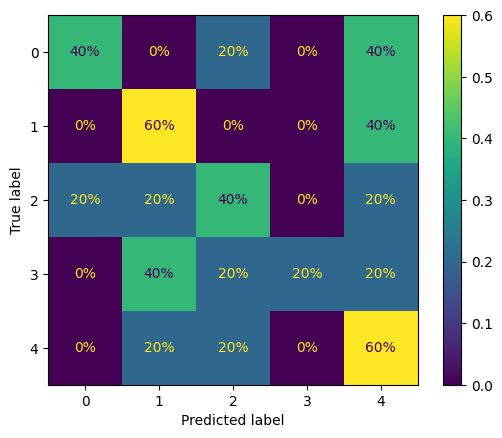

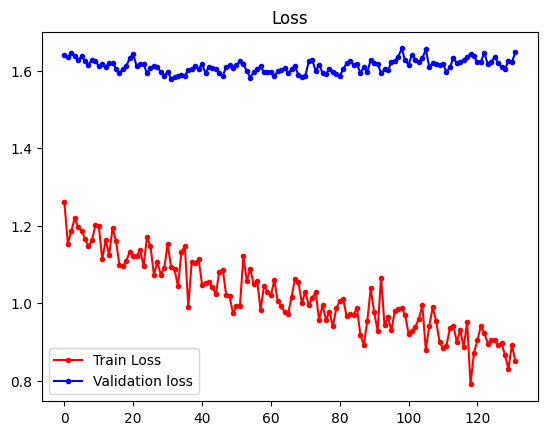

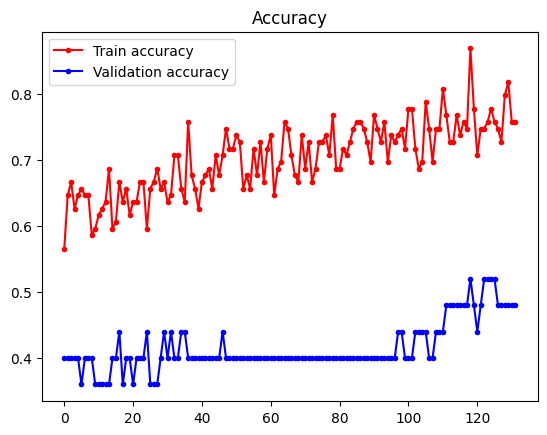

In [30]:
history1c=model1c.fit(X_train_c, y_train, epochs = 500, verbose = 0, shuffle = True, batch_size = 3, validation_data = (X_test_c, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model1c, history1c, X_test_c, y_test)

# 3 Classes

In [31]:
y = df_train_val['pond_3']
y.reset_index(drop=True, inplace=True)
embeddings_df['pond'] = y

## Dense model

In [32]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(128, input_shape=(encoding_dim,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(64, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
#mode31.add(keras.layers.Dropout(rate=0.25))
model3.add(keras.layers.Dense(8, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model3.add(keras.layers.Dense(3, activation ='softmax'))

model3.summary()
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,363 (44.39 KB)

 Trainable params: 11,363 (44.39 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 3
training for 1 subset


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7000 - loss: 1.0042
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicted classes:       [1 1 2 1 2 0 0 0 1 1 1 0 2 2 0 2 2 1 2 2]
true validation classes: [1 1 1 2 2 0 1 1 1 1 1 2 2 2 0 2 2 1 1 2]
mean confidence score: 408.5528, sd confidence score: 789.7503
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6000 - loss: 1.2894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
predicted classes:       [1 2 2 2 2 1 2 2 1 2 1 1 2 2 2 2 1 1 2 2]
true validation classes: [0 0 0 2 2 0 0 2 1 0 1 1 2 2 0 2 1 1 2 1]
mean confidence score: 3238.0963, sd confidence score: 13200.1065
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 1.2198
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
predicted classes:       [1 1 1 2 0 1 0 1 1 2 1 1 2 2 2 1 2 1 1 1]
true validation classes: [1 1 2 2 0 2 0 1 0 2 1 1 2 2 2 1 1 1 2 1]
mean confidence score: 67948.8094, sd confidence score: 287478.9546
training for 4 subset
1/1 

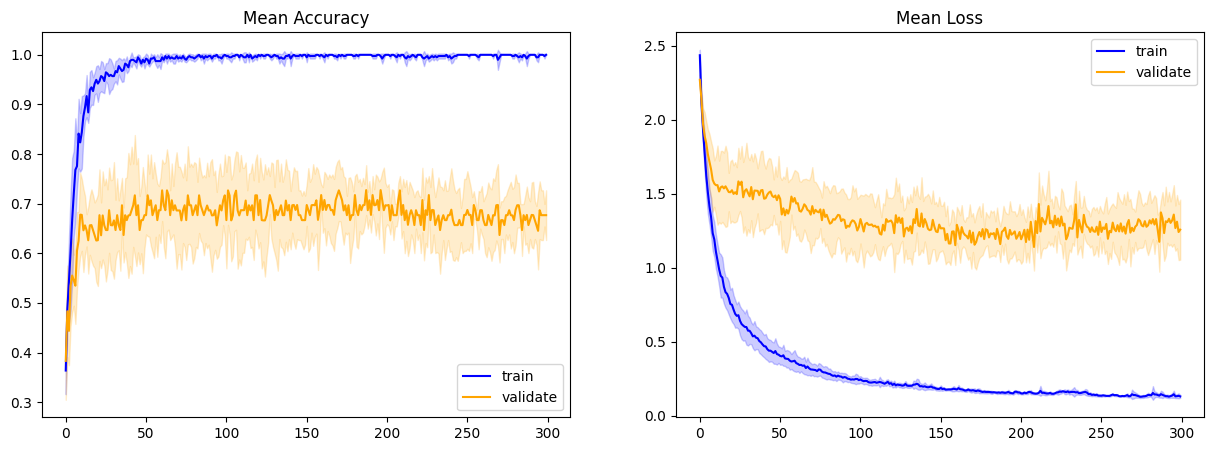

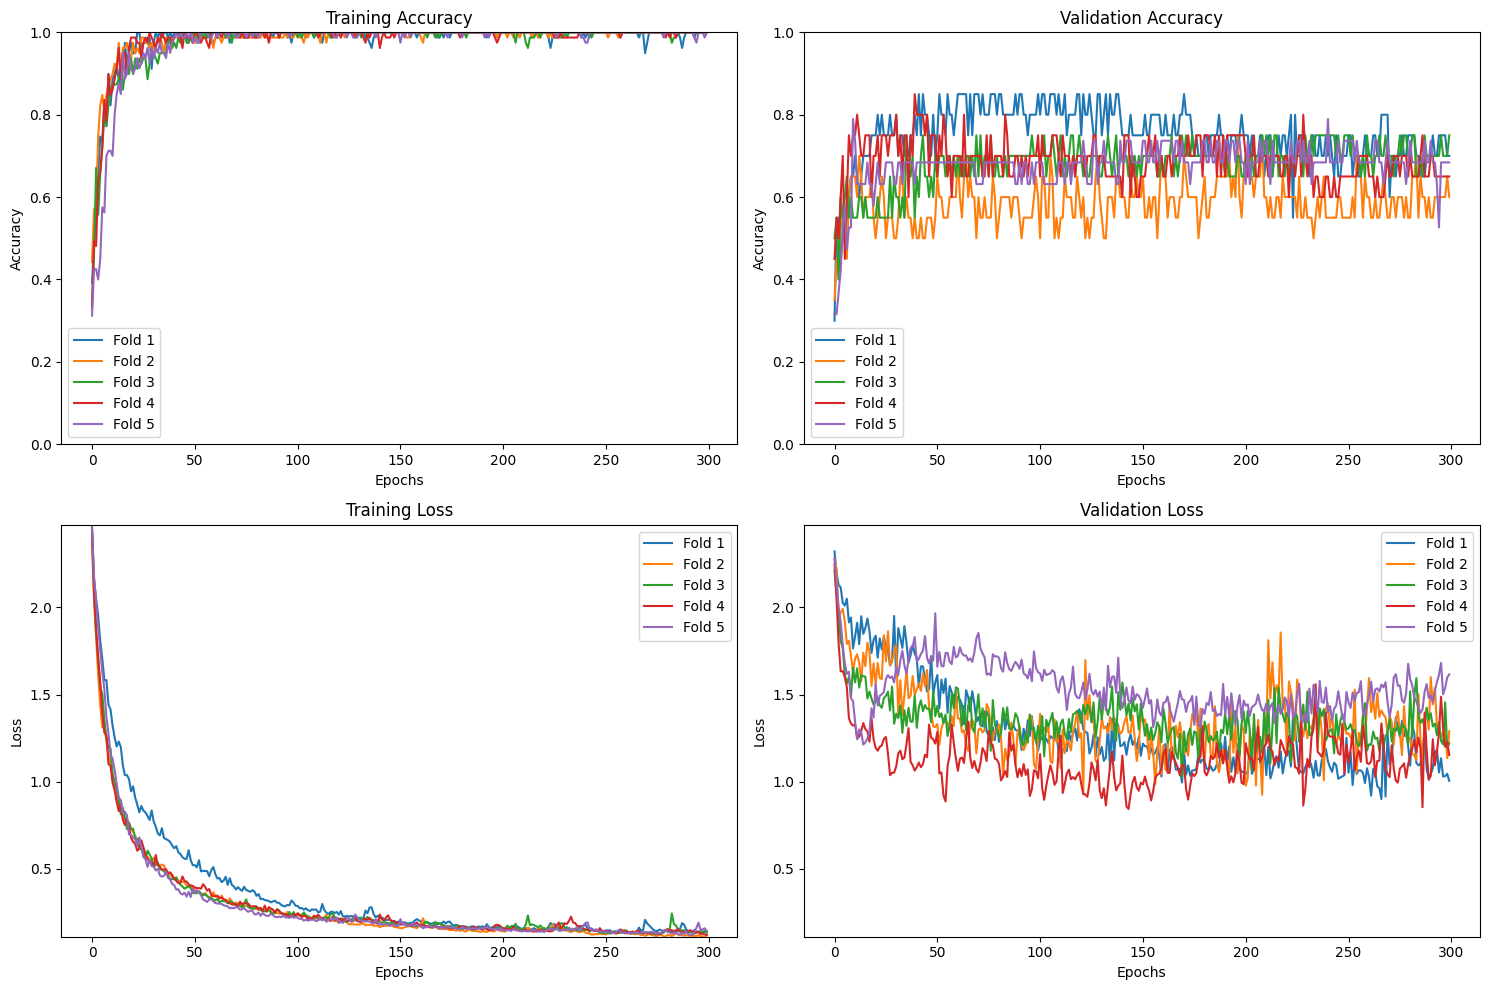

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [1 0 2 2 0 1 1 1 2 0 0 2 2 1 1 0 2 0 1]
true validation classes: [2 0 2 2 2 0 1 1 2 0 2 2 2 1 1 2 1 0 1]


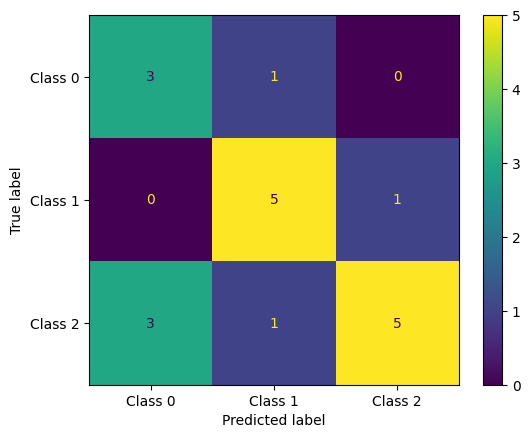

In [33]:
crossvalidate(embeddings_df, model3, column_names, 'pond',kf,300)

### Test

In [34]:
X_train = embeddings_df[column_names]
y_train = embeddings_df['pond']
y_train = keras.utils.to_categorical(y_train)
X_test = pd.DataFrame(embeddings_test, columns=column_names)
y_test = df_test['pond_3']
y_test = keras.utils.to_categorical(y_test)

Epoch 1/500


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5053 - loss: 2.4385 - val_accuracy: 0.4800 - val_loss: 2.0229
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5944 - loss: 1.8980 - val_accuracy: 0.5200 - val_loss: 1.9155
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4510 - loss: 1.9244 - val_accuracy: 0.5200 - val_loss: 1.7680
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - loss: 1.5238 - val_accuracy: 0.6000 - val_loss: 1.6112
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 1.3616 - val_accuracy: 0.6400 - val_loss: 1.5049
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 1.1910 - val_accuracy: 0.5600 - val_loss: 1.5372
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 1.1270 - val_accuracy: 0.6400 - val_loss: 1.4780
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 1.0582 - val_accuracy: 0.6800 - val_loss: 1.4

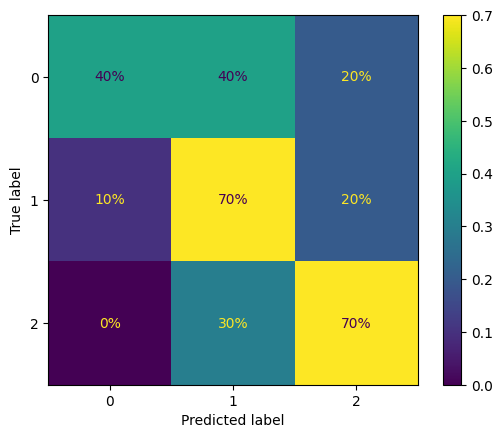

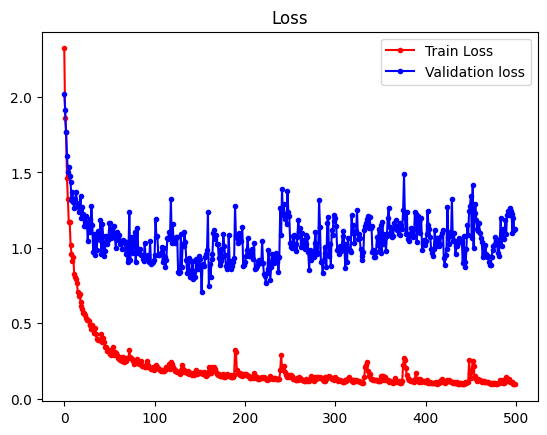

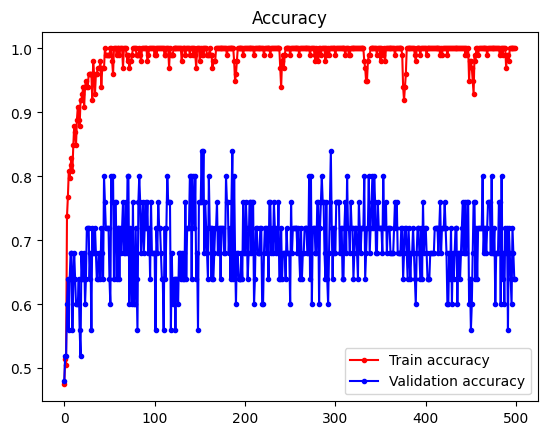

In [35]:
reset_weights(model3)
history3 = model3.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test))
evaluate_model(model3, history3, X_test, y_test)

## Convolution model    

In [36]:
model2c = keras.Sequential()
model2c.add(keras.layers.Conv1D(filters=1, kernel_size=3, activation='relu',input_shape = (encoding_dim,1),kernel_regularizer=keras.regularizers.l2(0.01)))
#model2c.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model2c.add(keras.layers.MaxPooling1D(pool_size = 2))
model2c.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model2c.add(Flatten())
model2c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model2c.add(keras.layers.Dropout(rate = 0.25))
model2c.add(keras.layers.Dense(16, activation = 'relu'))
model2c.add(keras.layers.Dense(3, activation ='softmax'))

model2c.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model2c.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 17, 1)          │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8, 64)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,127 (66.90 KB)

 Trainable params: 17,127 (66.90 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 3
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6000 - loss: 1.0595
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
predicted classes:       [1 2 2 2 2 1 0 1 1 2 1 2 2 2 1 1 2 1 2 2]
true validation classes: [1 1 1 2 2 0 1 1 1 1 1 2 2 2 0 2 2 1 1 2]
mean confidence score: 3.3767, sd confidence score: 4.8768
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4500 - loss: 1.3729
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [2 1 1 2 2 1 0 2 2 2 1 2 2 1 2 2 1 1 1 2]
true validation classes: [0 0 0 2 2 0 0 2 1 0 1 1 2 2 0 2 1 1 2 1]
mean confidence score: 3.7464, sd confidence score: 2.7175
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5500 - loss: 0.9560
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
predicted classes:       [1 1 0 2 1 1 1 1 1 2 1 1 1 2 2 0 2 2 2 1]
true validation classes: [1 1 2 2 0 2 0 1 0 2 1 1 2 2 2 1 1 1 2 1]
mean confidence score: 2.8658, sd confidence score: 4.0414
tra

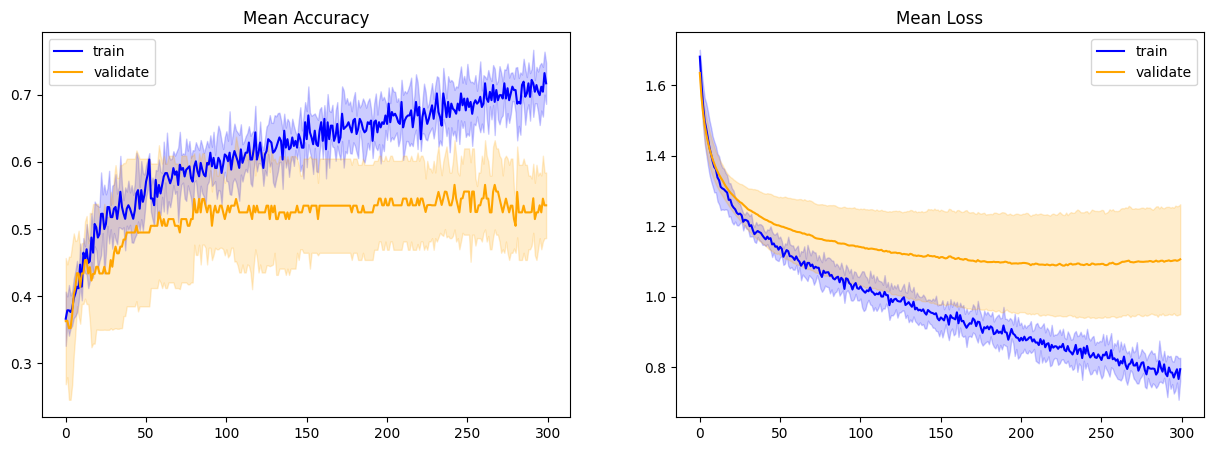

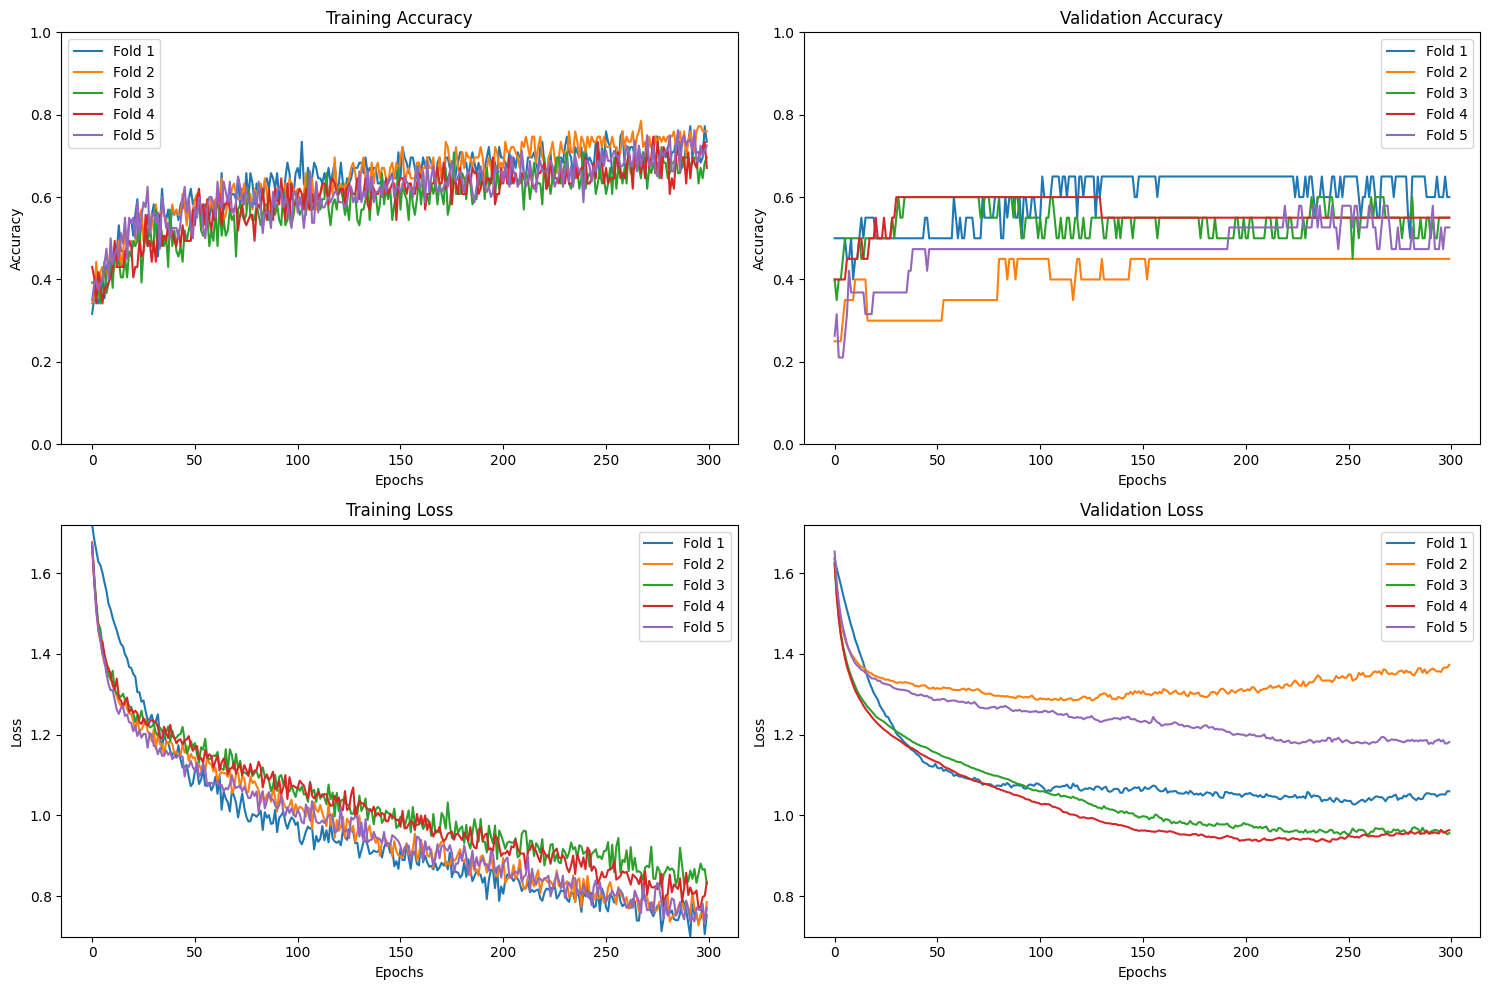

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
predicted classes:       [1 1 1 1 2 1 1 1 2 0 2 2 2 0 2 2 2 0 2]
true validation classes: [2 0 2 2 2 0 1 1 2 0 2 2 2 1 1 2 1 0 1]


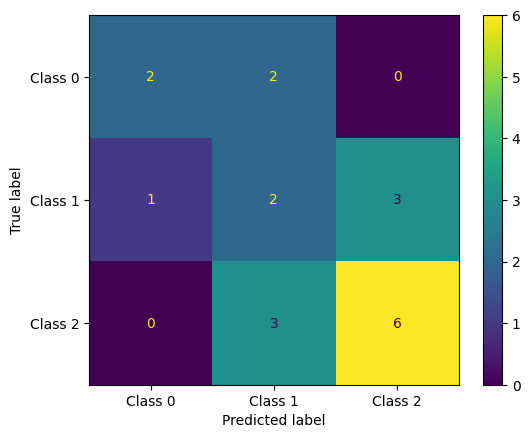

In [37]:
crossvalidate(embeddings_df, model2c, column_names, 'pond',kf,300,True)

### test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7600 - loss: 0.7515
[0.7514880895614624, 0.7599999904632568]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted values: [1 2 2 1 1 2 0 1 2 2 2 1 2 1 2 1 1 1 2 1 0 1 1 1 2]
True values: [1 0 2 1 1 1 0 1 2 2 2 1 2 0 2 1 1 0 2 2 0 1 2 1 2]


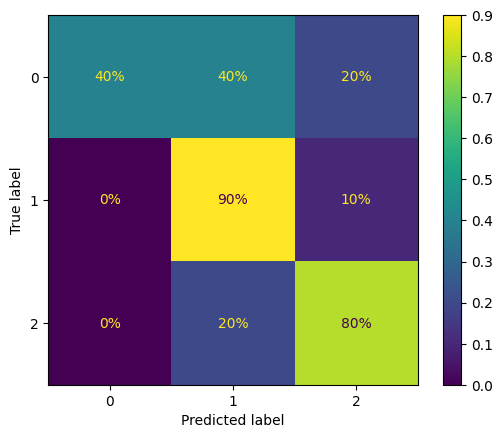

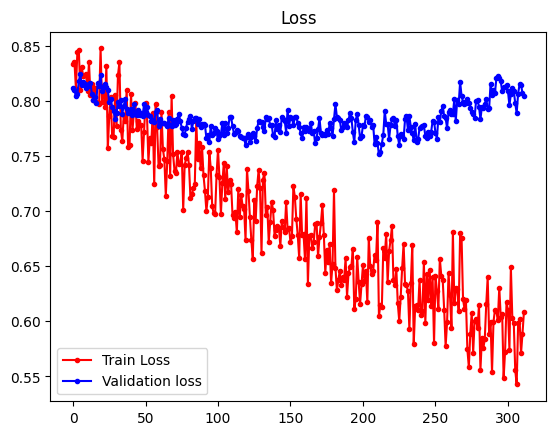

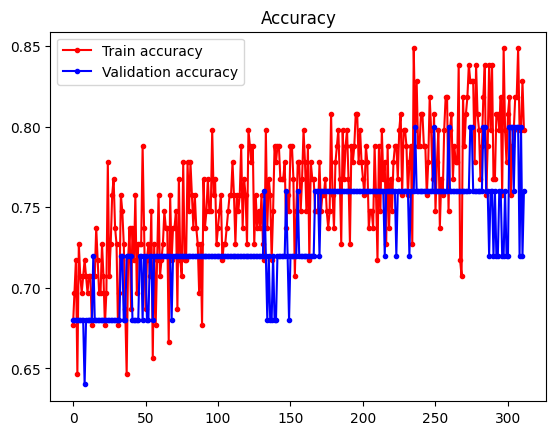

In [38]:
history2c=model2c.fit(X_train_c, y_train, epochs = 500, verbose = 0, shuffle = True, batch_size = 3, validation_data = (X_test_c, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model2c, history2c, X_test_c, y_test)

# 2 Classes

## Dense model

In [39]:
y = df_train_val['pond_2']
y.reset_index(drop=True, inplace=True)
embeddings_df['pond'] = y

In [40]:
model4 = keras.Sequential()
model4.add(keras.layers.Dense(64, input_shape=(encoding_dim,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Dense(32, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
#mode4.add(keras.layers.Dropout(rate=0.25))
model4.add(keras.layers.Dense(16, activation ='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model4.add(keras.layers.Dense(2, activation ='softmax'))

model4.summary()
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation

Number of classes: 2
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8000 - loss: 0.8829
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
predicted classes:       [0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1]
true validation classes: [0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1]
mean confidence score: 10100.3086, sd confidence score: 24548.7147
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8500 - loss: 0.9067
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0]
true validation classes: [0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0]
mean confidence score: 965.4598, sd confidence score: 1871.2887
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8000 - loss: 0.8004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
predicted classes:       [0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0]
true validation classes: [0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0]
mean confidence score: 15490.8143, sd confidence 

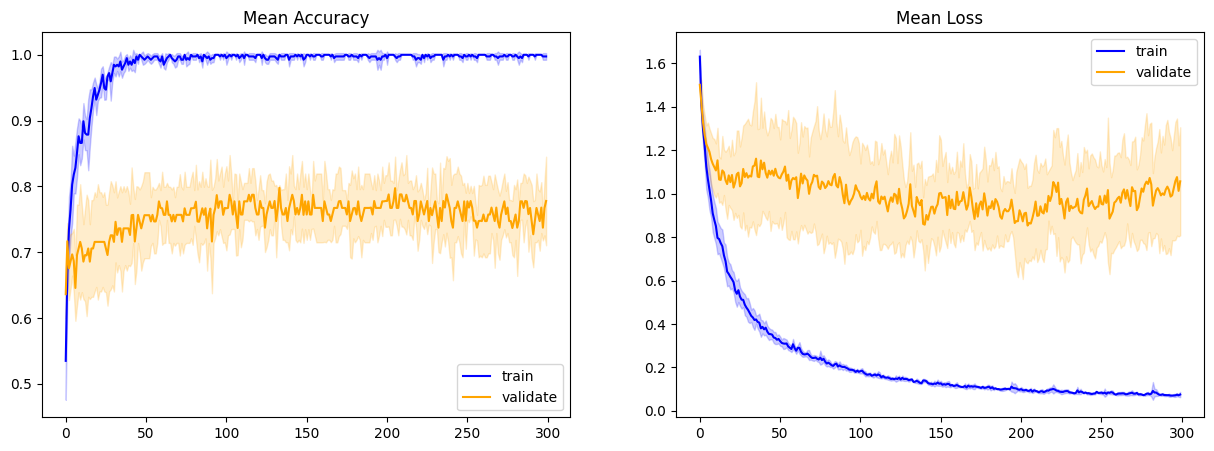

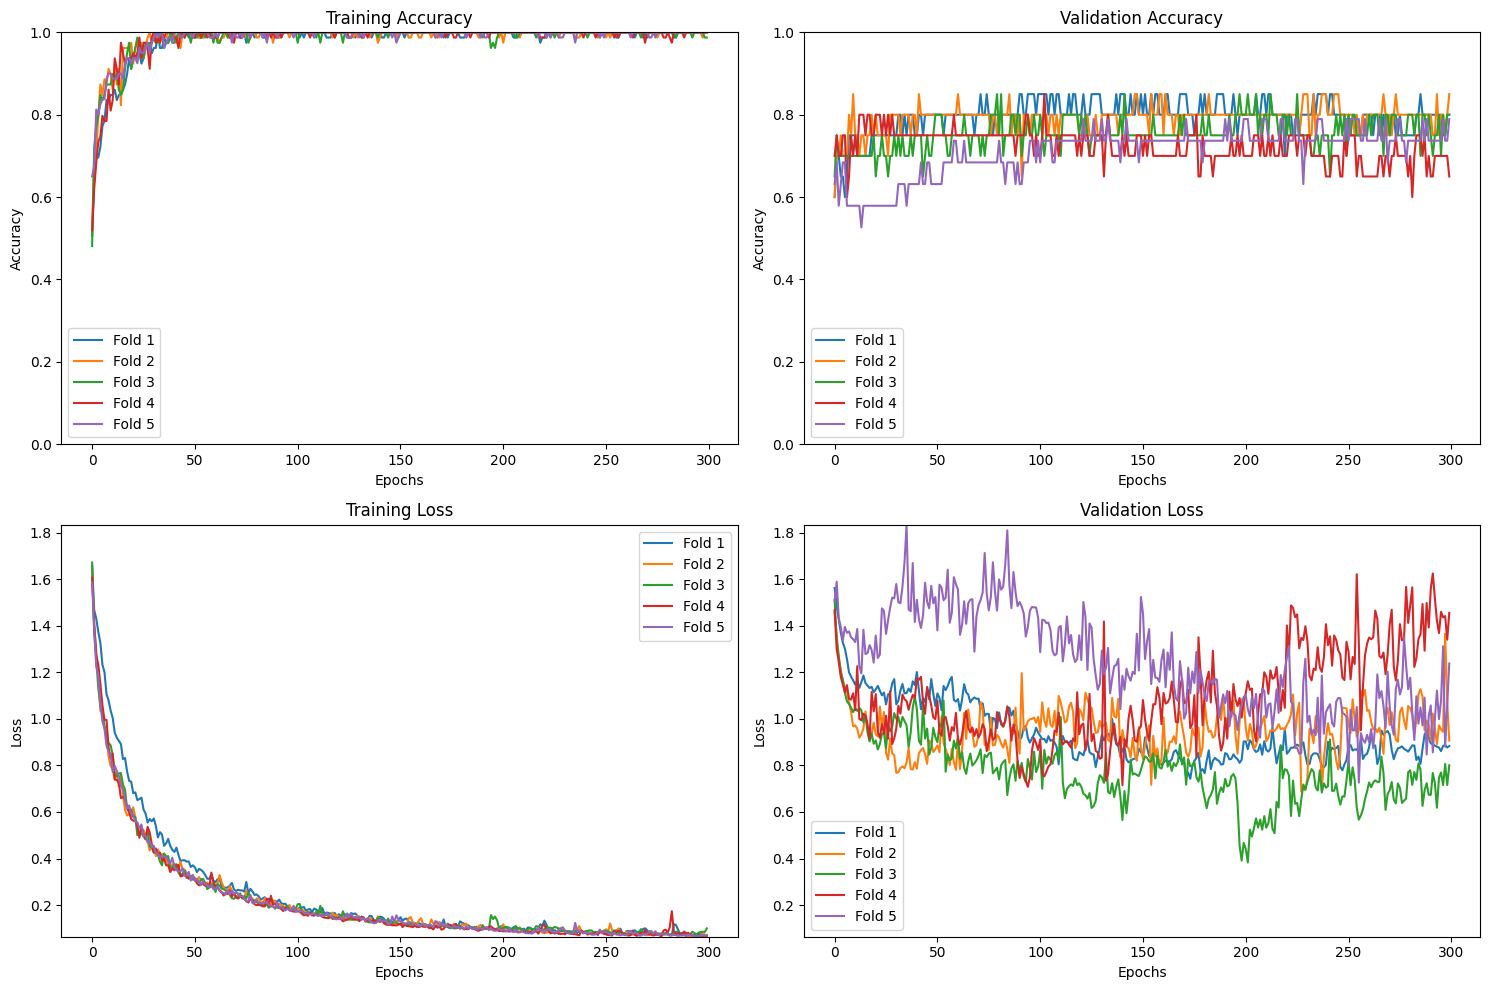

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0]
true validation classes: [1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0]


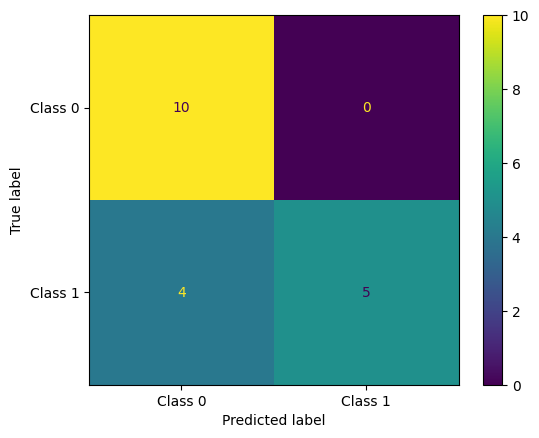

In [41]:
#reset_weights(model4)
crossvalidate(embeddings_df, model4, column_names, 'pond',kf,300)

### Test

In [42]:
X_train = embeddings_df[column_names]
y_train = embeddings_df['pond']
y_train = keras.utils.to_categorical(y_train)
X_test = pd.DataFrame(embeddings_test, columns=column_names)
y_test = df_test['pond_2']
y_test = keras.utils.to_categorical(y_test)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 0.4007 - val_accuracy: 0.8000 - val_loss: 0.5039
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9191 - loss: 0.2532 - val_accuracy: 0.8800 - val_loss: 0.5736
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9589 - loss: 0.1737 - val_accuracy: 0.8000 - val_loss: 0.5699
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9638 - loss: 0.1559 - val_accuracy: 0.7200 - val_loss: 0.7575
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.1352 - val_accuracy: 0.8400 - val_loss: 0.7335
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1054 - val_accuracy: 0.8800 - val_loss: 0.5853
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9711 - loss: 0.1407 - val_accuracy: 0.7200 - val_loss: 0.7824
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.1054 - val_accuracy: 0.7600 - v

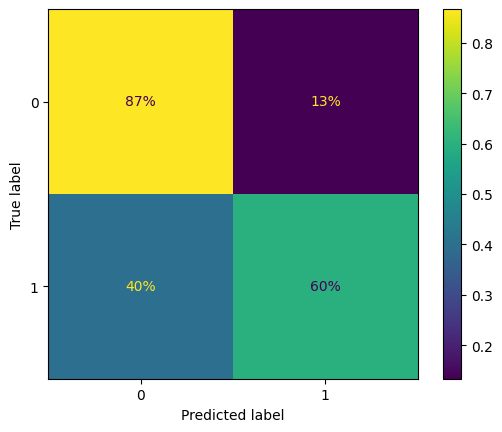

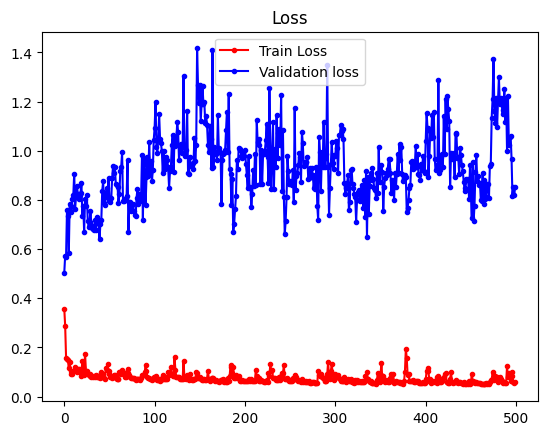

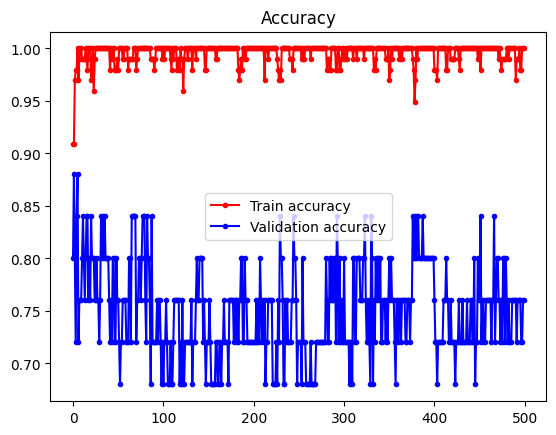

In [43]:
#  reset_weights(model4)
history3 = model4.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test))
evaluate_model(model4, history3, X_test, y_test)

## Convolution model

In [44]:
model3c = keras.Sequential()
model3c.add(keras.layers.Conv1D(filters=1, kernel_size=3, activation='relu',input_shape = (encoding_dim,1),kernel_regularizer=keras.regularizers.l2(0.01)))
#model3c.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model3c.add(keras.layers.MaxPooling1D(pool_size = 2))
model3c.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model3c.add(Flatten())
model3c.add(keras.layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model3c.add(keras.layers.Dropout(rate = 0.25))
model3c.add(keras.layers.Dense(16, activation = 'relu'))
model3c.add(keras.layers.Dense(8, activation = 'relu'))

model3c.add(keras.layers.Dense(2, activation ='softmax'))

model3c.summary()


loss = "categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model3c.compile(optimizer = optimizer, loss = loss, metrics=metrics)

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 17, 1)          │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 8, 64)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,230 (67.30 KB)

 Trainable params: 17,230 (67.30 KB)

 Non-trainable params: 0 (0.00 B)

### Crossvalidation


Number of classes: 2
training for 1 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6000 - loss: 1.3145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
predicted classes:       [1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1]
true validation classes: [0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1]
mean confidence score: 173.9051, sd confidence score: 271.1084
training for 2 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6000 - loss: 0.6608
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted classes:       [1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0]
true validation classes: [0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0]
mean confidence score: 14.1844, sd confidence score: 30.796
training for 3 subset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6500 - loss: 0.8507
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted classes:       [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0]
true validation classes: [0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0]
mean confidence score: 8.6476, sd confidence score: 7.66

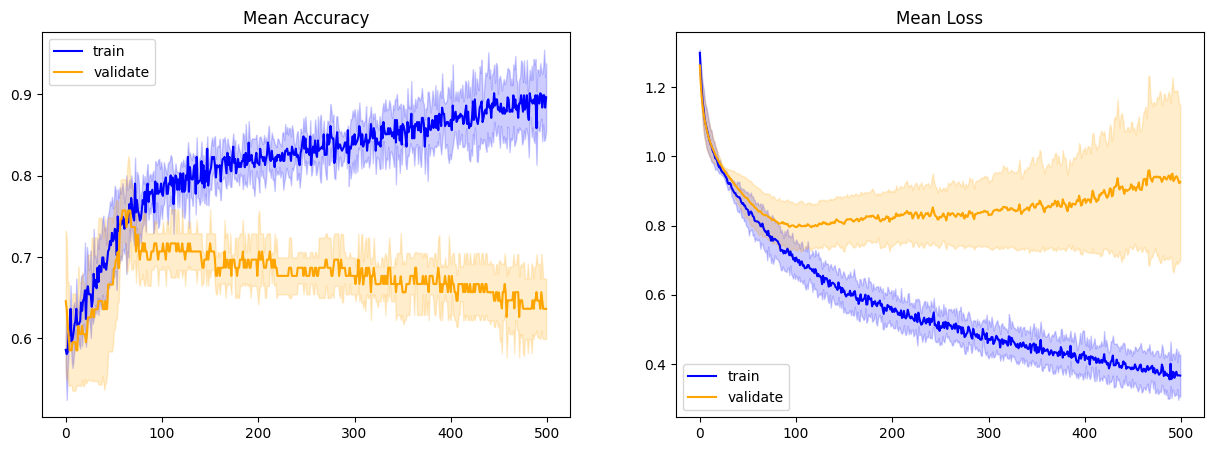

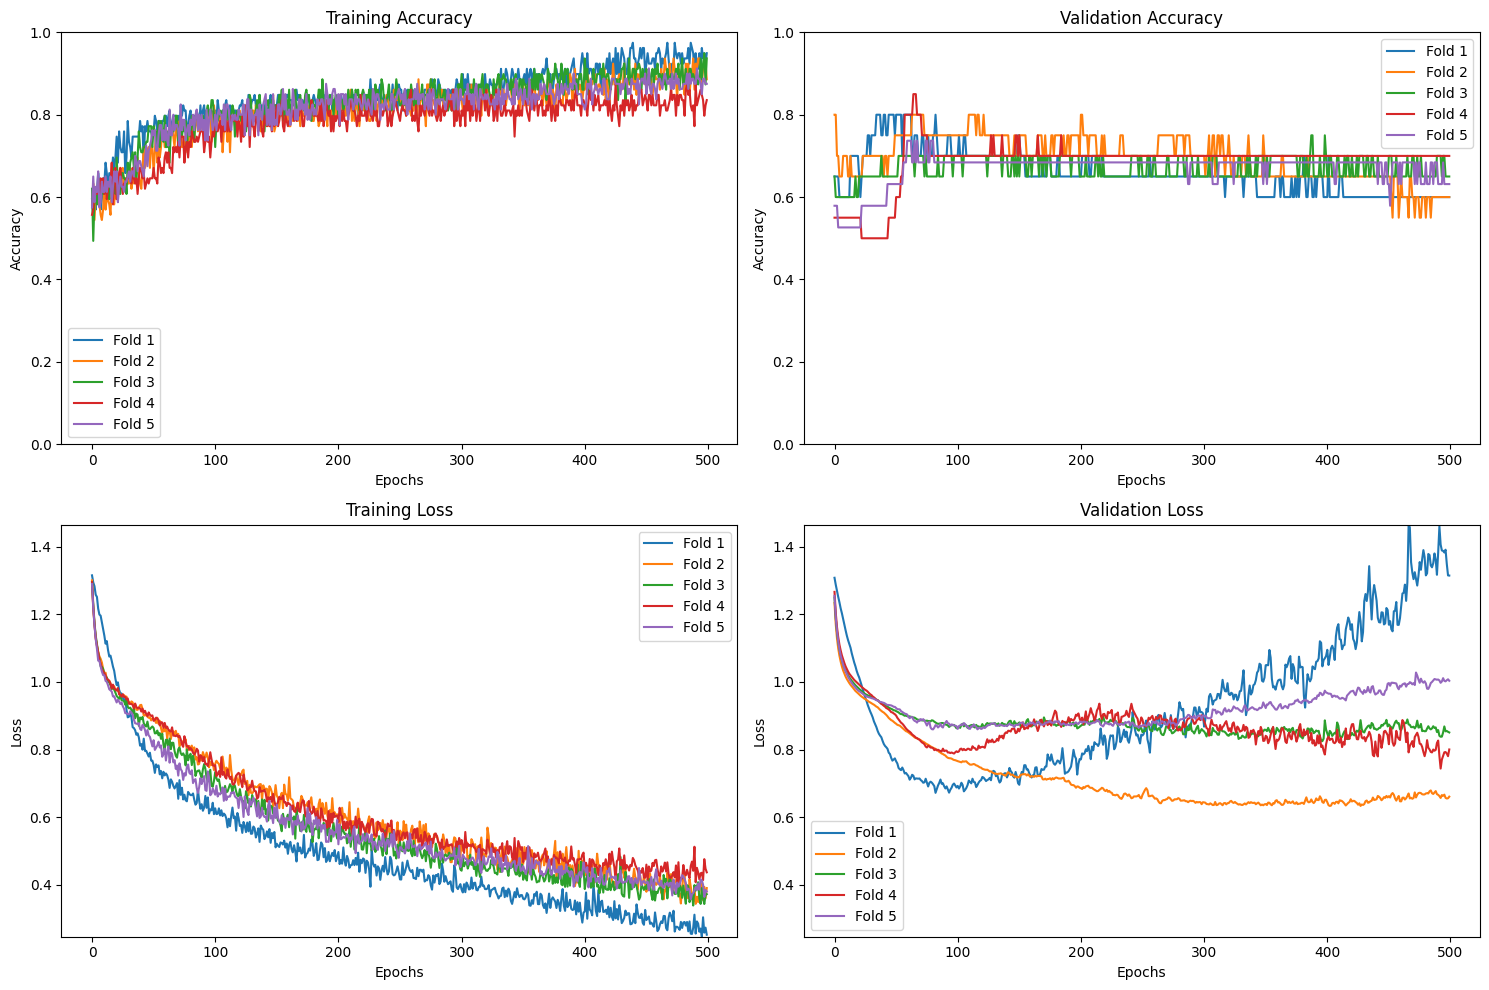

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted classes:       [1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0]
true validation classes: [1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0]


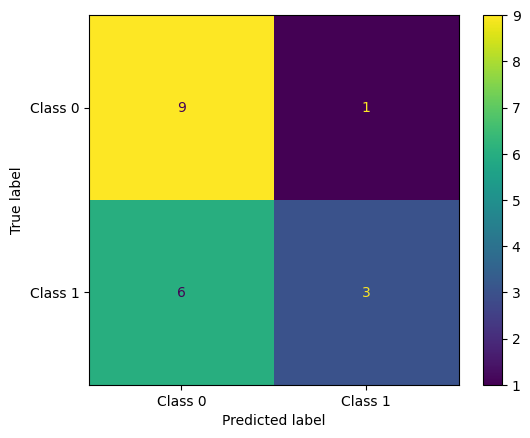

In [45]:
reset_weights(model3c)
crossvalidate(embeddings_df, model3c, column_names, 'pond',kf,500,True)

### Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6800 - loss: 0.8310
[0.8309923410415649, 0.6800000071525574]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted values: [0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1]
True values: [0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1]


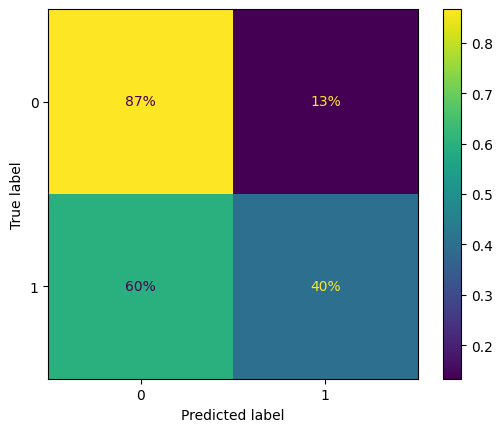

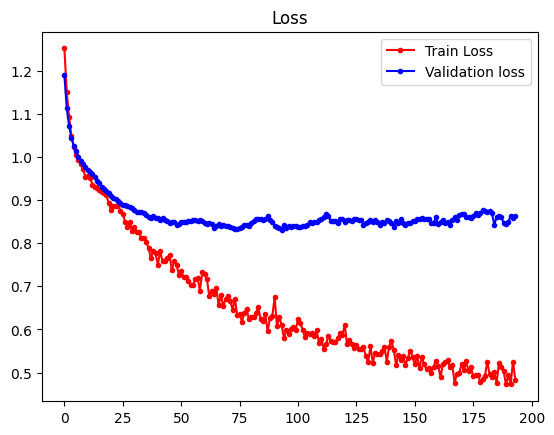

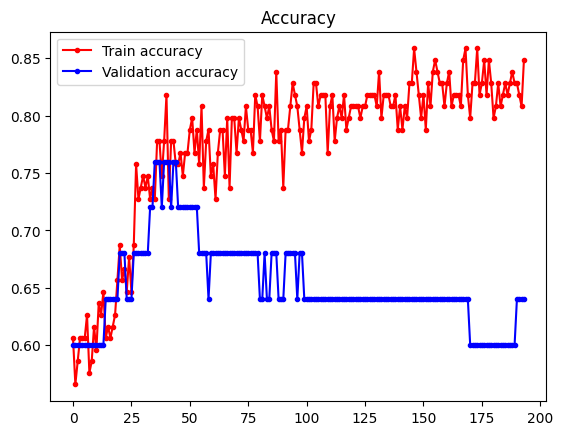

In [46]:
reset_weights(model3c)
history3c=model3c.fit(X_train_c, y_train, epochs = 500, verbose = 0, shuffle = True, batch_size = 3, validation_data = (X_test_c, y_test), callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)])
evaluate_model(model3c, history3c, X_test_c, y_test)